# The curse of dimensionality #
Welcome to this notebook. In this notebook the curse of dimensionality is demonstrated (see: https://www.datacamp.com/blog/curse-of-dimensionality-machine-learning). Intuitively you would say: "The more data, the better". This is not always true. Below a case is given where we add noise data to our fish data set. <br>
At the end a small assignment is given.


In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
#
# origin: https://documentation.sas.com/doc/en/statug/15.2/statug_sashelp_sect012.htm
# For each of the seven species (bream, roach, whitefish, parkki, perch, pike, and smelt),
# the weight, length, height, and width of each fish are tallied.
# Three different length measurements are recorded: from the nose of the fish to the beginning
# of its tail, from the nose to the notch of its tail, and from the nose to the end of its tail.
#
df = pd.read_csv(url)
df.head()
import numpy as np
np.random.seed(42)
df['noise1'] = np.random.normal(5,5,df.shape[0])
df['noise2'] = np.random.normal(30,5,df.shape[0])
df.head()


,Category,Species,Weight,Height,Width,Length1,Length2,Length3,noise1,noise2
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0,7.483571,33.282768
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2,4.308678,25.126592
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1,8.238443,33.935423
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5,12.615149,35.792978
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0,3.829233,25.896588


We will make a function which automaticly tests different models...

In [2]:
def test_model (model):
    from sklearn.model_selection import train_test_split
    # we always want to work with a training, validation and test data set
    X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.9, random_state=42)

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_temp = scaler.transform(X_train)                                              # scaling the train data set
    X_train = pd.DataFrame(X_temp, columns=X_train.columns)
    X_temp = scaler.transform(X_validation)                                              # scaling the test data set
    X_validation = pd.DataFrame(X_temp, columns=X_validation.columns)
    X_temp = scaler.transform(X_test)                                              # scaling the test data set
    X_test = pd.DataFrame(X_temp, columns=X_test.columns)
    print (X_train.head)
    model.fit(X_train, y_train)                                                     # train the model
    pred = model.predict(X_validation)
    from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
    import matplotlib.pyplot as plt
    ConfusionMatrixDisplay.from_predictions(y_validation, pred)
    print ('accuracy is :',accuracy_score(y_validation, pred))


Let's apply a k-NN model on the data set with the added noise.

<bound method NDFrame.head of        Weight    Height    noise1    noise2
0   -0.956314 -1.062734  0.966505  2.015358
1    0.513975 -0.259441  0.957517  0.197842
2   -0.133465  0.891871  0.779770  0.672630
3   -0.760941 -0.681725  1.066724 -0.437275
4   -0.646855 -0.449896 -0.686046 -1.469579
..        ...       ...       ...       ...
122 -0.247552  0.638351  1.734107 -0.829017
123 -0.390160 -0.252311  2.107277 -1.341045
124  0.608097  1.538754 -1.763354  0.231342
125 -0.675376 -0.510502 -0.666976  0.802045
126 -0.247552 -0.126128 -0.281812 -0.165163

[127 rows x 4 columns]>
accuracy is : 0.5172413793103449


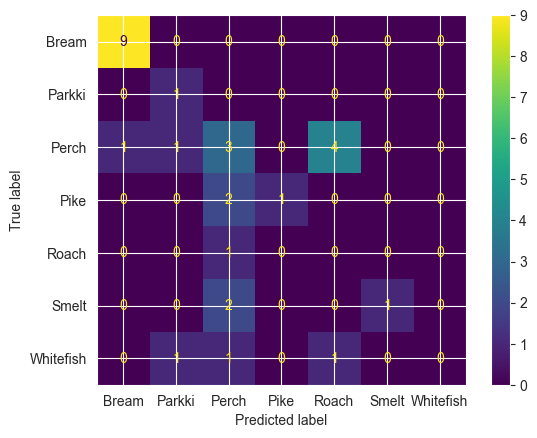

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
X=df.drop(['Category','Species','Length1','Width','Length2','Length3'],axis=1)
y=df['Species']
test_model(model)

And now without the noise (we drop the noise1 and noise2).

<bound method NDFrame.head of        Weight    Height
0   -0.956314 -1.062734
1    0.513975 -0.259441
2   -0.133465  0.891871
3   -0.760941 -0.681725
4   -0.646855 -0.449896
..        ...       ...
122 -0.247552  0.638351
123 -0.390160 -0.252311
124  0.608097  1.538754
125 -0.675376 -0.510502
126 -0.247552 -0.126128

[127 rows x 2 columns]>
accuracy is : 0.7586206896551724


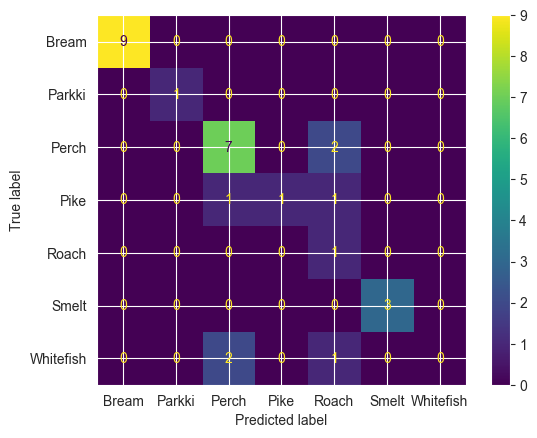

In [4]:
X=df.drop(['Category','Species','Length1','Width','Length2','Length3','noise1','noise2'],axis=1)
y=df['Species']
test_model(model)

When we compare the confusion matrices we see that the model with the added noise is significantly worse!

<bound method NDFrame.head of        Weight    Height    noise1    noise2
0   -0.956314 -1.062734  0.966505  2.015358
1    0.513975 -0.259441  0.957517  0.197842
2   -0.133465  0.891871  0.779770  0.672630
3   -0.760941 -0.681725  1.066724 -0.437275
4   -0.646855 -0.449896 -0.686046 -1.469579
..        ...       ...       ...       ...
122 -0.247552  0.638351  1.734107 -0.829017
123 -0.390160 -0.252311  2.107277 -1.341045
124  0.608097  1.538754 -1.763354  0.231342
125 -0.675376 -0.510502 -0.666976  0.802045
126 -0.247552 -0.126128 -0.281812 -0.165163

[127 rows x 4 columns]>
accuracy is : 0.6551724137931034


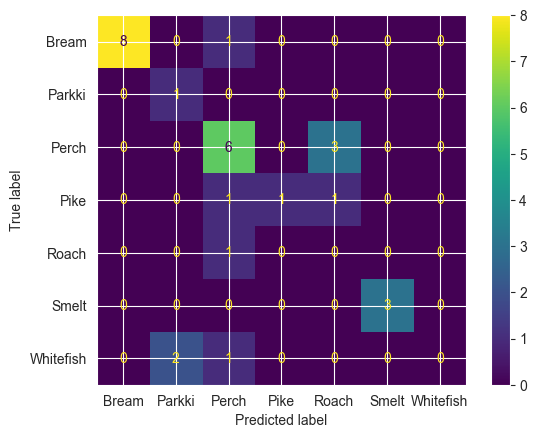

In [5]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
X=df.drop(['Category','Species','Length1','Width','Length2','Length3'],axis=1)   # we only want to use Weight and Height as features, drop the rest
y=df['Species']                                                                 # we want to predict the species of the fish
test_model(model)

<bound method NDFrame.head of        Weight    Height
0   -0.956314 -1.062734
1    0.513975 -0.259441
2   -0.133465  0.891871
3   -0.760941 -0.681725
4   -0.646855 -0.449896
..        ...       ...
122 -0.247552  0.638351
123 -0.390160 -0.252311
124  0.608097  1.538754
125 -0.675376 -0.510502
126 -0.247552 -0.126128

[127 rows x 2 columns]>
accuracy is : 0.6896551724137931


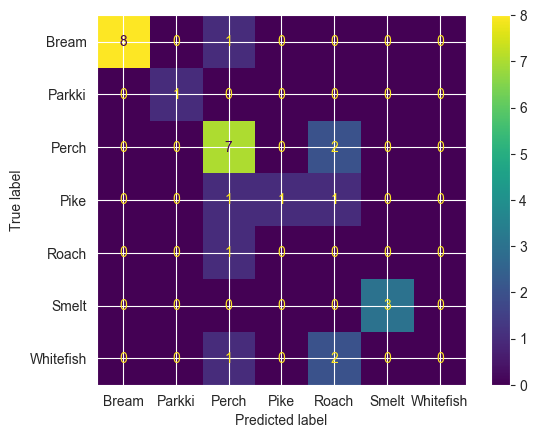

In [6]:
X=df.drop(['Category','Species','Length1','Width','Length2','Length3','noise1','noise2'],axis=1)   # we only want to use Weight and Height as features, drop the rest
y=df['Species']                                                                 # we want to predict the species of the fish
test_model(model)

We see that the impact on a decision tree is much less (which we expected), but still present!

1. Investigate the performance of random forest and SVM in the same manner.

<bound method NDFrame.head of        Weight    Height    noise1    noise2
0   -0.956314 -1.062734  0.966505  2.015358
1    0.513975 -0.259441  0.957517  0.197842
2   -0.133465  0.891871  0.779770  0.672630
3   -0.760941 -0.681725  1.066724 -0.437275
4   -0.646855 -0.449896 -0.686046 -1.469579
..        ...       ...       ...       ...
122 -0.247552  0.638351  1.734107 -0.829017
123 -0.390160 -0.252311  2.107277 -1.341045
124  0.608097  1.538754 -1.763354  0.231342
125 -0.675376 -0.510502 -0.666976  0.802045
126 -0.247552 -0.126128 -0.281812 -0.165163

[127 rows x 4 columns]>
accuracy is : 0.6551724137931034


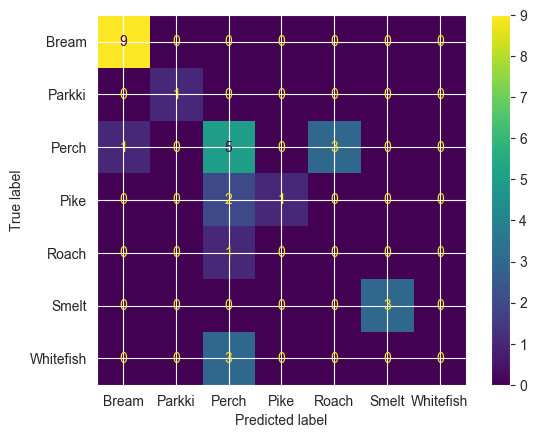

In [7]:
#inport random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
X=df.drop(['Category','Species','Length1','Width','Length2','Length3'],axis=1)
y=df['Species']
test_model(model)

<bound method NDFrame.head of        Weight    Height
0   -0.956314 -1.062734
1    0.513975 -0.259441
2   -0.133465  0.891871
3   -0.760941 -0.681725
4   -0.646855 -0.449896
..        ...       ...
122 -0.247552  0.638351
123 -0.390160 -0.252311
124  0.608097  1.538754
125 -0.675376 -0.510502
126 -0.247552 -0.126128

[127 rows x 2 columns]>
accuracy is : 0.7241379310344828


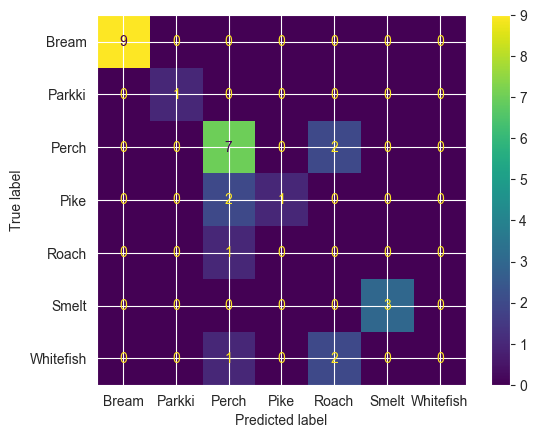

In [8]:
# without noise
X=df.drop(['Category','Species','Length1','Width','Length2','Length3','noise1','noise2'],axis=1)
y=df['Species']
test_model(model)

We see that the impact on a random forest is also limited, but still present!

<bound method NDFrame.head of        Weight    Height    noise1    noise2
0   -0.956314 -1.062734  0.966505  2.015358
1    0.513975 -0.259441  0.957517  0.197842
2   -0.133465  0.891871  0.779770  0.672630
3   -0.760941 -0.681725  1.066724 -0.437275
4   -0.646855 -0.449896 -0.686046 -1.469579
..        ...       ...       ...       ...
122 -0.247552  0.638351  1.734107 -0.829017
123 -0.390160 -0.252311  2.107277 -1.341045
124  0.608097  1.538754 -1.763354  0.231342
125 -0.675376 -0.510502 -0.666976  0.802045
126 -0.247552 -0.126128 -0.281812 -0.165163

[127 rows x 4 columns]>
accuracy is : 0.7241379310344828


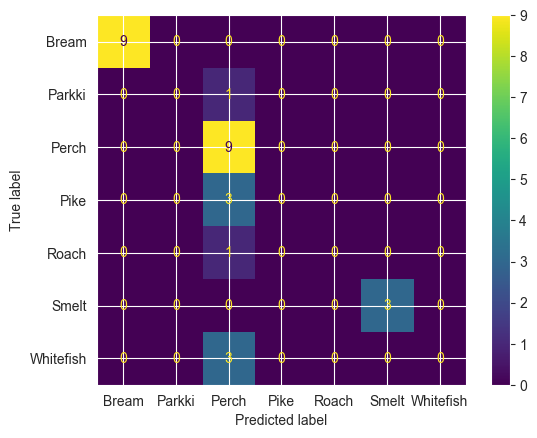

In [9]:
# import SVM
from sklearn import svm
model = svm.SVC()
X=df.drop(['Category','Species','Length1','Width','Length2','Length3'],axis=1)
y=df['Species']
test_model(model)

<bound method NDFrame.head of        Weight    Height
0   -0.956314 -1.062734
1    0.513975 -0.259441
2   -0.133465  0.891871
3   -0.760941 -0.681725
4   -0.646855 -0.449896
..        ...       ...
122 -0.247552  0.638351
123 -0.390160 -0.252311
124  0.608097  1.538754
125 -0.675376 -0.510502
126 -0.247552 -0.126128

[127 rows x 2 columns]>
accuracy is : 0.8275862068965517


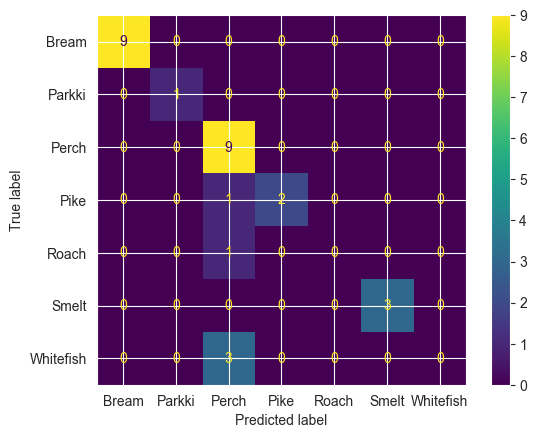

In [10]:
# without noise
X=df.drop(['Category','Species','Length1','Width','Length2','Length3','noise1','noise2'],axis=1)
y=df['Species']
test_model(model)

The noice has also an impact on the SVM model, but it is less than on the k-NN model. The pike - pike is completely gone, i dont know if this is a good thing or not.